<a href="https://colab.research.google.com/github/Makepeace123/Eswatini-Economic-Indicators-Forecast-Dashboard-/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Data importation
df = sns.load_dataset("tips")

#Data summaries
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
#checking for missing values
df.isna().sum().sort_values()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
#if there were missing values
#1.Drop
df.dropna()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#2. Impute them using mean()
df_num = df.select_dtypes('float64', 'int64')
df_cat = df.select_dtypes('category')

df_num.fillna(df_num.mean())
df_cat[["sex","smoker","time","day"]].astype(str).fillna('Unknown')
df_imputed=pd.concat((df_num,df_cat))
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'smoker', 'day', 'time'],
    drop_first=True
)

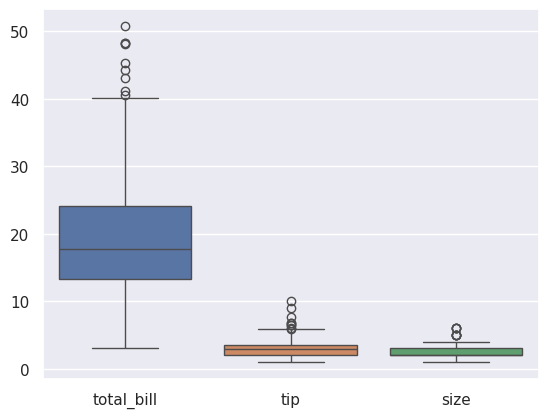

In [ ]:
#plotting for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df)
plt.show()

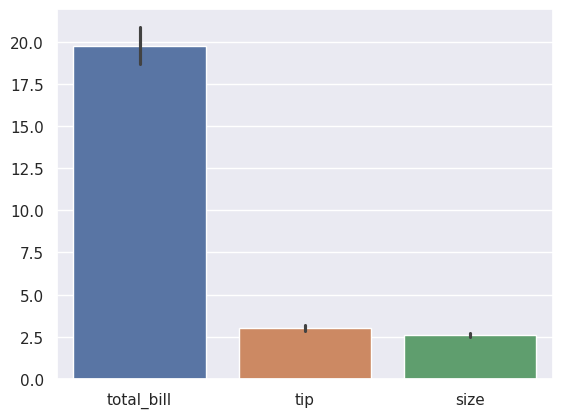

In [ ]:
sns.barplot(df)
plt.show()

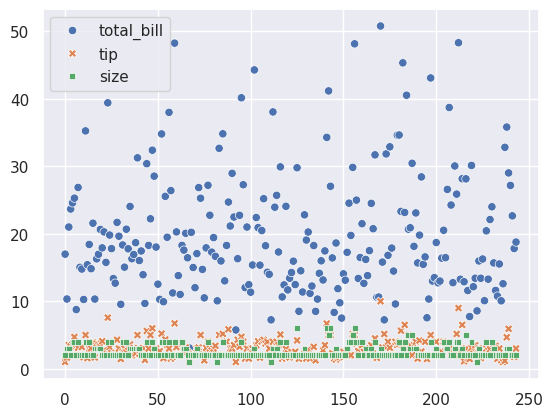

In [ ]:
sns.scatterplot(df)
plt.show()

In [ ]:
df_encoded

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,False,True,False,True
240,27.18,2.00,2,True,False,False,True,False,True
241,22.67,2.00,2,False,False,False,True,False,True
242,17.82,1.75,2,False,True,False,True,False,True


In [ ]:
X=df_encoded.drop(['total_bill'], axis=1)
y=df["total_bill"]

In [ ]:
X.corr()

,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
tip,1.000000,0.489299,-0.088862,-0.005929,-0.055463,-0.002790,0.125114,0.121629
size,0.489299,1.000000,-0.086195,0.133178,-0.142184,-0.041121,0.193054,0.103411
sex_Female,-0.088862,-0.086195,1.000000,0.002816,0.071060,-0.053957,-0.168106,-0.205231
smoker_No,-0.005929,0.133178,0.002816,1.000000,-0.244316,-0.155744,0.181624,-0.054921
day_Fri,-0.055463,-0.142184,0.071060,-0.244316,1.000000,-0.216319,-0.195451,-0.058159
day_Sat,-0.002790,-0.041121,-0.053957,-0.155744,-0.216319,1.000000,-0.500682,0.462709
day_Sun,0.125114,0.193054,-0.168106,0.181624,-0.195451,-0.500682,1.000000,0.418071
time_Dinner,0.121629,0.103411,-0.205231,-0.054921,-0.058159,0.462709,0.418071,1.000000


In [ ]:
#Training a LinearRegression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

33.09700568784197

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.6096523875766392

In [ ]:
rmse = np.sqrt(mse)
rmse

np.float64(5.7529997121364405)

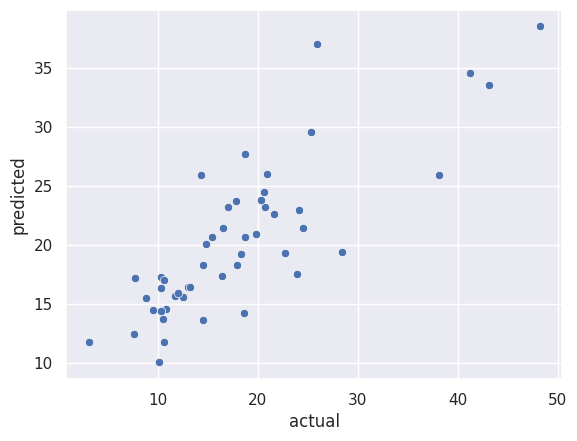

In [ ]:
#actual vs predict plot
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [ ]:
future_steps = 3
last_t = df['total_bill'].iloc[-1]

future_t = np.arange(last_t + 1, last_t + future_steps + 1)
future_df = pd.DataFrame({'total_bill': future_t})

future_df['Forecast'] = model.predict(future_df[['total_bill']])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 8 features as input.